<a href="https://colab.research.google.com/github/Aryaak/MriksoHoax_FabricatedNewsDetector/blob/main/FInal_Project_Intel_AI_MriksoHoax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MriskoHoax - Fabricated News Detector**



###Import packages

In [ ]:
# pandas for file
import pandas as pd

# sklearn for data processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# numpy, scipy, matplotlib for data visualisation
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')


###Import train news dataset

Read & print csv file

In [ ]:
df_train = pd.read_csv('train_news.csv')
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Convert label to real/fake

In [ ]:
convert_label = {0: "Real", 1: "Fake"}
df_train['label'] = df_train['label'].replace(convert_label)
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake


Count real & fake news

In [ ]:
df_train.label.value_counts()

Fake    10413
Real    10387
Name: label, dtype: int64

Visualisation

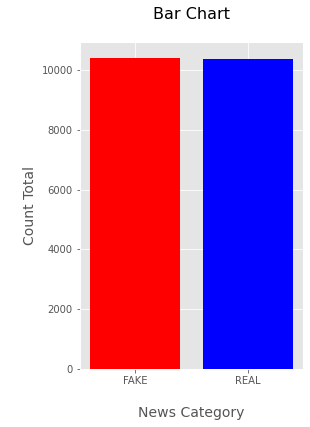

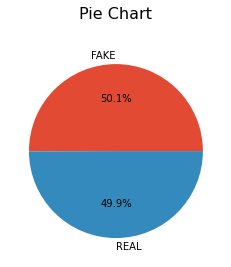

In [ ]:
# Bar Chart
count = df_train.label.value_counts()
plt.figure(figsize=(4, 6))
plt.bar(['FAKE', 'REAL'], count, color=['red','blue'])
plt.xlabel('\nNews Category', size=14)
plt.ylabel('\nCount Total', size=14)
plt.title('Bar Chart\n', size=16)
plt.show()

print('\n')

# Pie Chart
Fake, Real= 10413, 10387
fig, ax = plt.subplots()
ax.pie((Fake, Real), labels=('FAKE', 'REAL'), autopct='%1.1f%%')
plt.title('Pie Chart\n', size=16)
plt.show()

Train dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_train['text'], df_train['label'], test_size=0.25, random_state=7, shuffle=True)
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.75)

In [ ]:
vec_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U'))
vec_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(vec_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred=pac.predict(vec_test)
score=accuracy_score(y_test,y_pred)
print(f'PAC Accuracy: {round(score*100,2)}%')

PAC Accuracy: 96.27%


In [ ]:
confusion_matrix(y_test, y_pred, labels=['Real', 'Fake'])

array([[2488,   98],
       [  96, 2518]])

In [ ]:
X=tfidf_vectorizer.transform(df_train['text'].values.astype('U'))

In [ ]:
scores=cross_val_score(pac, X, df_train['label'].values, cv=5)

kfold_accuracy = score.mean() * 100
print(f'K FOLD Accuracy: {round(kfold_accuracy,2)}%')

K FOLD Accuracy: 96.27%


###Import real news dataset

Read & print csv file

In [ ]:
df_real = pd.read_csv('true_news.csv')
df_real['label']='Real'
df_real

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real


###Import fake news dataset


Read & print csv file

In [ ]:
df_fake = pd.read_csv('fake_news.csv')
df_fake['label']='Fake'
df_fake

ParserError: ignored

###Check news real/fake function

Function

In [ ]:
def checkNews(text):
  vec_newtest = tfidf_vectorizer.transform([text])
  y_pred1=pac.predict(vec_newtest) 
  return y_pred1[0]

Check from real news data set

In [ ]:
checkNews(df_real['text'][0])


Check from fake news data set

In [ ]:
checkNews(df_fake['text'][0])


Check from random news in internet

In [ ]:
checkNews('Republicans in the U.S. Congress reached a deal on tax legislation on Wednesday, clearing the way for final votes next week on a package that, if approved, would be sent to President Donald Trump to sign into law. Formal language of the legislation, expected to add at least $1 trillion to the $20-trillion national debt over a decade, has not been released. The following are known provisions on which House of Representatives and Senate tax writers have agreed, based on conversations with aides and lawmakers: CORPORATE TAX RATE: Falls to 21 percent from 35 percent. The House and Senate bills, as well as Trump, had earlier proposed 20 percent. Going to 21 percent gave tax writers more federal revenue needed to allow the tax cut to take effect immediately. U.S. corporations have been seeking a large tax cut like this for many years.  PASS-THROUGH BUSINESSES: Creates a 20 percent business income deduction for owners of pass-through businesses, such as sole proprietorships and partnerships. The House had proposed a 25 percent tax rate; the Senate, a 23 percent deduction.  CORPORATE MINIMUM: Repeals the corporate alternative minimum tax, which was set up to ensure profitable companies pay at least some federal tax. CLEAN ENERGY: Maintains production tax credit for wind energy and the $7,500 electric vehicle tax credit. The House had proposed repealing the electric vehicle credit and scaling back the wind energy credit. The Senate version did neither. INDIVIDUAL INCOME TAX RATES: There will be seven brackets, and the top rate falls to 37 percent from 39.6 percent. The House had proposed maintaining the 39.6 percent top rate and condensing the current seven tax brackets to four. The Senate had proposed cutting the top rate to 38.5 percent and maintaining seven brackets. PERMANENCE: The expectation is that individual tax rates will snap back to current levels in less than 10 years, possibly after 2024. The individual tax rates in the House bill were to be permanent. The individual tax rates in the Senate bill were to expire after 2025. STATE AND LOCAL TAX (SALT): Both the House and Senate had proposed scaling back the popular individual deduction for state and local tax payments by limiting it to property-tax payments and capping that at $10,000. The compromise bill will keep that $10,000 cap, but allow for continued deduction of both state and local income tax payments, as well as property tax payments. MORTGAGE INTEREST: Caps the mortgage interest deduction for new mortgages at $750,000 in home loan value, down from the current $1 million. The House had proposed a $500,000 cap. The Senate bill left it at $1 million. ESTATE TAX: Roughly doubles the exemption from the federal estate tax on inherited assets to about $11 million per person, or about $22 million per couple, but leaves the estate tax in place, mirroring the Senate proposal. The House bill had proposed entirely repealing the estate tax over several years. OBAMACARE MANDATE: Repeals a federal fine imposed on Americans under Obamacare for not obtaining health insurance coverage. The House bill did not repeal the Obamacare individual mandate.  ANWR DRILLING: Allows oil drilling in Alaskaâ€™s Arctic National Wildlife Refuge. The provision was sponsored by Republican Senator Lisa Murkowski of Alaska. ')
